In [1]:
import matplotlib.pyplot as plt
import gensim
import pandas as pd
import numpy as np
import spacy

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
#from gensim.models.wrappers import LdaMallet
# LdaMallet was removed in gensim 4.0.0
from gensim.corpora import Dictionary

from gensim import corpora

import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Topic modeling

test all gensim topic modelin using gensim dataset or ur own dataset (ex: tweets)

In [2]:
def clean_text(text):

    translator = str.maketrans('', '', string.punctuation)
    text_without_punctuations = text.translate(translator)
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()

    tokens = word_tokenize(text_without_punctuations)

    filtered_tokens = [word for word in tokens if word.lower() not in stopwords.words("english")]

    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in filtered_tokens]

    stemmed_words = [stemmer.stem(word) for word in lemmatized_words]

    return stemmed_words

In [3]:
# Input from csv
df = pd.read_csv('voted-kaggle-dataset.csv')

df = df.dropna()

df.shape


(768, 15)

In [4]:
text_data = []

for i in range(len(df['Description'])):
    try:
        text_data.append(clean_text(df['Description'][i]))
    except:
        pass
text_data

[['dataset',
  'contain',
  'transact',
  'make',
  'credit',
  'card',
  'septemb',
  '2013',
  'european',
  'cardhold',
  'dataset',
  'present',
  'transact',
  'occur',
  'two',
  'day',
  '492',
  'fraud',
  '284807',
  'transact',
  'dataset',
  'highli',
  'unbal',
  'posit',
  'class',
  'fraud',
  'account',
  '0172',
  'transact',
  'contain',
  'numer',
  'input',
  'variabl',
  'result',
  'pca',
  'transform',
  'unfortun',
  'due',
  'confidenti',
  'issu',
  'provid',
  'origin',
  'featur',
  'background',
  'inform',
  'data',
  'featur',
  'v1',
  'v2',
  'v28',
  'princip',
  'compon',
  'obtain',
  'pca',
  'featur',
  'transform',
  'pca',
  'time',
  'amount',
  'featur',
  'time',
  'contain',
  'second',
  'elaps',
  'transact',
  'first',
  'transact',
  'dataset',
  'featur',
  'amount',
  'transact',
  'amount',
  'featur',
  'use',
  'exampledepend',
  'costsenst',
  'learn',
  'featur',
  'class',
  'respons',
  'variabl',
  'take',
  'valu',
  '1',
  'cas

In [13]:
import pickle

pickle.dump(text_data, open('text_data.pkl', 'wb'))

In [14]:
text_data = pickle.load(open('text_data.pkl', 'rb'))

# Create a dictionary
dictionary = corpora.Dictionary(text_data)

# Create a corpus
corpus = [dictionary.doc2bow(text) for text in text_data]

In [24]:
# Train the LDA model
lda_model = LdaModel(corpus, id2word=dictionary)
Lsi_model = LsiModel(corpus, id2word=dictionary)
Hdp_model = HdpModel(corpus, id2word=dictionary)


In [29]:
Ldacoher = CoherenceModel(model=lda_model, texts=text_data, dictionary=dictionary, coherence='c_v').get_coherence()
Lsicoher = CoherenceModel(model=Lsi_model, texts=text_data, dictionary=dictionary, coherence='c_v').get_coherence()
hdpcoher = CoherenceModel(model=Hdp_model, texts=text_data, dictionary=dictionary, coherence='c_v').get_coherence()

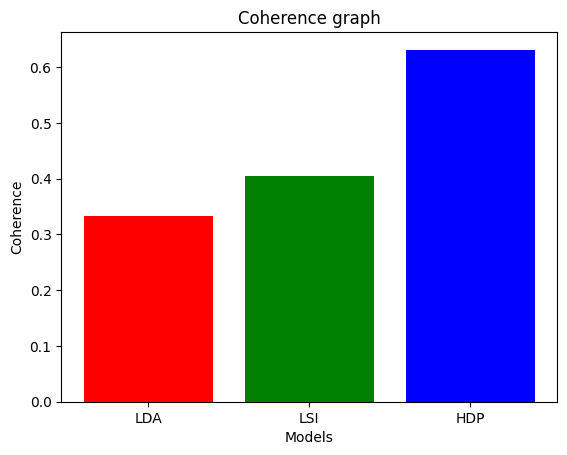

In [30]:
plt.bar(['LDA', 'LSI', 'HDP'], [Ldacoher, Lsicoher, hdpcoher],color=['red', 'green', 'blue'])
plt.title('Coherence graph')
plt.xlabel('Models')
plt.ylabel('Coherence')
plt.show()

In [32]:
topics = Hdp_model.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.012*data + 0.007*dataset + 0.005*use + 0.004*contain + 0.003*includ + 0.003*inform')
(1, '0.007*data + 0.006*dataset + 0.003*use + 0.002*contain + 0.002*time + 0.002*content')
(2, '0.009*integ + 0.008*12345 + 0.008*strongli + 0.005*interest + 0.004*agre + 0.004*disagre')
(3, '0.006*data + 0.004*dataset + 0.002*inform + 0.002*player + 0.002*use + 0.002*year')
(4, '0.006*data + 0.005*dataset + 0.003*detail + 0.003*file + 0.003*use + 0.002*contain')
(5, '0.009*player + 0.006*team + 0.004*faceoff + 0.004*goal + 0.004*shoot + 0.004*ice')
(6, '0.003*user + 0.003*data + 0.003*dataset + 0.002*tweet + 0.002*use + 0.002*movi')
(7, '0.005*race + 0.004*hors + 0.003*data + 0.003*section + 0.003*time + 0.002*pokémon')
(8, '0.006*data + 0.002*dataset + 0.002*includ + 0.001*column + 0.001*anim + 0.001*softwar')
(9, '0.003*use + 0.003*cancer + 0.002*data + 0.002*gene + 0.002*question + 0.002*women')
(10, '0.004*dataset + 0.002*per + 0.002*town + 0.002*data + 0.002*mean + 0.002*salari')
(11, '0.0